## 👀 Self attention

#### 📚 Libraries

In [44]:
import torch
from torch import nn
from torch.nn import functional as F

import matplotlib.pyplot as plt
import seaborn as sns

#### 🧶 For loop implementation

In [2]:
torch.manual_seed(42)

b, t, c = 4, 8, 2  # batch, time, channels
x = torch.randn(b, t, c)
x.shape

torch.Size([4, 8, 2])

**Cumulative average**

In [3]:
# We want x[b, t] = mean{i<=t} x[b, i]
xbow = torch.zeros((b, t, c))
for batch in range(b):
    for time in range(t):
        xprev = x[batch, 0 : time + 1]  # (time, c)
        xbow[batch, time] = torch.mean(xprev, dim=0)

In [4]:
batch = 0

join = "└─"
join_char = "──"
line = "│ "

print("{:^17}{:^18}{:^17}".format("x", "", "xbow"))
for time in range(t):
    x_time = str(x[batch, time].numpy().round(3))
    xbow_time = str(xbow[batch, time].numpy().round(3))

    n_joins = time + 1
    n_lines = t - n_joins
    line_str = "".join([line * n_lines])
    join_line_str = "".join([join, join_char * (n_joins - 1)])
    whole_string = line_str + join_line_str

    print("{:^17}{:^18}{:^17}".format(x_time, whole_string, xbow_time))

        x                                xbow       
  [1.927 1.487]   │ │ │ │ │ │ │ └─   [1.927 1.487]  
 [ 0.901 -2.106]  │ │ │ │ │ │ └───  [ 1.414 -0.309] 
 [ 0.678 -1.235]  │ │ │ │ │ └─────  [ 1.169 -0.618] 
 [-0.043 -1.605]  │ │ │ │ └───────  [ 0.866 -0.864] 
 [-0.752  1.649]  │ │ │ └─────────  [ 0.542 -0.362] 
 [-0.392 -1.404]  │ │ └───────────  [ 0.386 -0.535] 
 [-0.728 -0.559]  │ └─────────────  [ 0.227 -0.539] 
 [-0.769  0.762]  └───────────────  [ 0.103 -0.376] 


#### 🦐 Matrix multiplication implementation

In [5]:
torch.manual_seed(42)
d = torch.tril(torch.ones(3, 3))
d = d / torch.sum(d, dim=1, keepdim=True)
e = torch.randint(0, 10, (3, 2)).float()
f = d @ e
print("d =")
print(d)
print()
print("e =")
print(e)
print()
print("f =")
print(f)

d =
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])

e =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])

f =
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [6]:
wei = torch.tril(torch.ones(t, t))
wei = wei / torch.sum(wei, dim=1, keepdim=True)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [7]:
xbow2 = wei @ x  # (b, t, t) @ (b, t, c) = (b, t, c

In [8]:
print("{:^17}{:^18}{:^17}".format("xbow", "", "xbow2"))
for time in range(t):
    xbow_time = str(xbow[batch, time].numpy().round(3))
    xbow2_time = str(xbow2[batch, time].numpy().round(3))
    print("{:^17}{:^18}{:^17}".format(xbow_time, "<--->", xbow2_time))

print()
print("xbow == xbow2:", torch.allclose(xbow, xbow2))

      xbow                               xbow2      
  [1.927 1.487]        <--->         [1.927 1.487]  
 [ 1.414 -0.309]       <--->        [ 1.414 -0.309] 
 [ 1.169 -0.618]       <--->        [ 1.169 -0.618] 
 [ 0.866 -0.864]       <--->        [ 0.866 -0.864] 
 [ 0.542 -0.362]       <--->        [ 0.542 -0.362] 
 [ 0.386 -0.535]       <--->        [ 0.386 -0.535] 
 [ 0.227 -0.539]       <--->        [ 0.227 -0.539] 
 [ 0.103 -0.376]       <--->        [ 0.103 -0.376] 

xbow == xbow2: True


#### 🚚 Softmax implementation

In [9]:
tril = torch.tril(torch.ones(t, t))
wei = torch.zeros((t, t))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x

In [10]:
print("{:^17}{:^18}{:^17}".format("xbow", "", "xbow3"))
for time in range(t):
    xbow_time = str(xbow[batch, time].numpy().round(3))
    xbow3_time = str(xbow3[batch, time].numpy().round(3))
    print("{:^17}{:^18}{:^17}".format(xbow_time, "<--->", xbow3_time))

print()
print("xbow == xbow3:", torch.allclose(xbow, xbow3))

      xbow                               xbow3      
  [1.927 1.487]        <--->         [1.927 1.487]  
 [ 1.414 -0.309]       <--->        [ 1.414 -0.309] 
 [ 1.169 -0.618]       <--->        [ 1.169 -0.618] 
 [ 0.866 -0.864]       <--->        [ 0.866 -0.864] 
 [ 0.542 -0.362]       <--->        [ 0.542 -0.362] 
 [ 0.386 -0.535]       <--->        [ 0.386 -0.535] 
 [ 0.227 -0.539]       <--->        [ 0.227 -0.539] 
 [ 0.103 -0.376]       <--->        [ 0.103 -0.376] 

xbow == xbow3: True


### 👾 Dynamic attention

In [111]:
torch.manual_seed(42)

b, t, c = 4, 8, 16  # batch, time, channels
x = torch.randn(b, t, c)
x.shape

torch.Size([4, 8, 16])

In [112]:
head_size = 5
key = nn.Linear(c, head_size, bias=False)
query = nn.Linear(c, head_size, bias=False)
value = nn.Linear(c, head_size, bias=False)

In [113]:
k = key(x)  # (b, t, c) -> (b, t, head_size)
q = query(x)  # (b, t, c) -> (b, t, head_size)
v = value(x)  # (b, t, c) -> (b, t, head_size)

# (b, t, head_size) @ (b, head_size, t) -> (b, t, t)
wei = q @ k.transpose(-2, -1)

tril = torch.tril(torch.ones(t, t))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)

xbow4 = wei @ v  # (b, t, t) @ (b, t, head_size) -> (b, t, head_size)
# xbow4 = wei @ x

In [120]:
wei[0].shape, v[0].shape, xbow4[0].shape

(torch.Size([8, 8]), torch.Size([8, 5]), torch.Size([8, 5]))

In [115]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4827, 0.5173, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3892, 0.3878, 0.2230, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3354, 0.1389, 0.2629, 0.2628, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2134, 0.2029, 0.1730, 0.2532, 0.1575, 0.0000, 0.0000, 0.0000],
        [0.0345, 0.4175, 0.1204, 0.1324, 0.1568, 0.1384, 0.0000, 0.0000],
        [0.0660, 0.1558, 0.1532, 0.1590, 0.1416, 0.1283, 0.1961, 0.0000],
        [0.0611, 0.1078, 0.1269, 0.0979, 0.0864, 0.1224, 0.1889, 0.2087]],
       grad_fn=<SelectBackward0>)

In [122]:
v[0]

tensor([[ 0.1124, -1.7420, -1.4984,  0.2784, -1.2044],
        [ 0.6001,  0.7585,  0.7401, -0.6920, -0.2413],
        [ 0.6153,  0.3175, -1.2560,  0.9560,  1.1514],
        [ 0.3441,  0.0547, -0.2634,  0.8739,  0.6132],
        [ 0.7046,  0.7144,  0.6741, -0.8596, -0.2965],
        [-0.2931, -0.0920, -0.2405, -0.1029, -0.1537],
        [-0.7494,  0.8432, -0.6698,  0.5173,  0.7469],
        [-0.3061,  0.6982, -0.1136, -0.2800,  0.3943]],
       grad_fn=<SelectBackward0>)

In [116]:
xbow4[0]

tensor([[ 0.1124, -1.7420, -1.4984,  0.2784, -1.2044],
        [ 0.3647, -0.4484, -0.3404, -0.2236, -0.7062],
        [ 0.4137, -0.3131, -0.5764,  0.0532, -0.3055],
        [ 0.3733, -0.3810, -0.7992,  0.4782,  0.0264],
        [ 0.4503, -0.0365, -0.3474,  0.1703,  0.0018],
        [ 0.4439,  0.4014,  0.1436, -0.1975,  0.0098],
        [ 0.1650,  0.3152, -0.2847,  0.1625,  0.2416],
        [ 0.0029,  0.3765, -0.3183,  0.1017,  0.2855]],
       grad_fn=<SelectBackward0>)

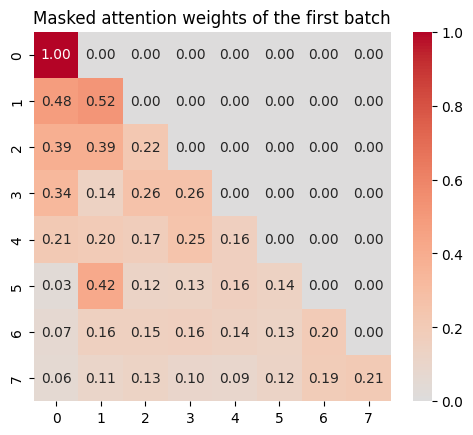

In [102]:
plt.figure(figsize=(t * 0.72, t * 0.6))
sns.heatmap(
    wei[0].detach().numpy(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    center=0,
)
plt.title("Masked attention weights of the first batch")
plt.show()

In [107]:
np.exp()

2.718281828459045